# Block 1: Load the dataset


In [2]:
import pandas as pd

DATASET_PATH = "../dataset/Base.csv"

df = pd.read_csv(DATASET_PATH)

# quick checks
print("Shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

print("\nFirst 5 rows:")
display(df.head())

print("\nMissing values per column:")
print(df.isna().sum())

Shape: (1000000, 32)

Column types:
fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     in

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0



Missing values per column:
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                

# 2

In [4]:
# === Block 2 (minimal): target balance + column type flags ===
import pandas as pd
import numpy as np

target_col = "fraud_bool"  # change only if your target has a different name

# 1) Target balance
if target_col in df.columns:
    counts = df[target_col].value_counts(dropna=False)
    props = (counts / len(df)).round(4)
    print("Target counts:\n", counts.to_string())
    print("\nTarget proportions:\n", props.to_string())
else:
    print(f"Target column '{target_col}' not found. Please update `target_col`.")

# 2) Basic column splits
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# 3) Numeric columns that are low-cardinality (likely categorical)
num_like_cat = [c for c in num_cols if df[c].nunique() <= 20 and c != target_col]

print("\n---")
print(f"Numeric columns ({len(num_cols)}): {num_cols[:15]}{'...' if len(num_cols)>15 else ''}")
print(f"Categorical/object columns ({len(cat_cols)}): {cat_cols[:15]}{'...' if len(cat_cols)>15 else ''}")
print(f"Numeric-looking columns with low cardinality (treat these as categorical): {num_like_cat}")


Target counts:
 fraud_bool
0    988971
1     11029

Target proportions:
 fraud_bool
0    0.989
1    0.011

---
Numeric columns (27): ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score']...
Categorical/object columns (5): ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Numeric-looking columns with low cardinality (treat these as categorical): ['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


# 3

In [5]:
# === Block 3: Encode categorical features ===
from sklearn.preprocessing import OneHotEncoder

# Split again for clarity
obj_cols = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
low_card_numlike = ['email_is_free', 'phone_home_valid', 'phone_mobile_valid',
                    'has_other_cards', 'foreign_request', 'keep_alive_session']

# 1) One-hot encode object columns (low cardinality)
df_encoded = pd.get_dummies(df, columns=obj_cols, drop_first=True)

# 2) Keep low-cardinality numeric-as-cat columns as they are (0/1 or small ints)
# Already usable — no changes needed for now

print("Encoded shape:", df_encoded.shape)
print("Example columns after encoding:", df_encoded.columns[:20])


Encoded shape: (1000000, 48)
Example columns after encoding: Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards'],
      dtype='object')


# 4

In [6]:
# === Block 4: Scale numeric features ===
from sklearn.preprocessing import StandardScaler

# Separate features and target
target_col = "fraud_bool"
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature matrix shape:", X_scaled.shape)
print("First row (scaled):", X_scaled[0][:10])  # preview first 10 features


Scaled feature matrix shape: (1000000, 47)
First row (scaled): [-0.90477846  1.70449737 -0.40227227 -0.69664367  0.52478204 -0.18933513
  4.63488549 -0.51094619  2.46919315  2.0829829 ]


# 5

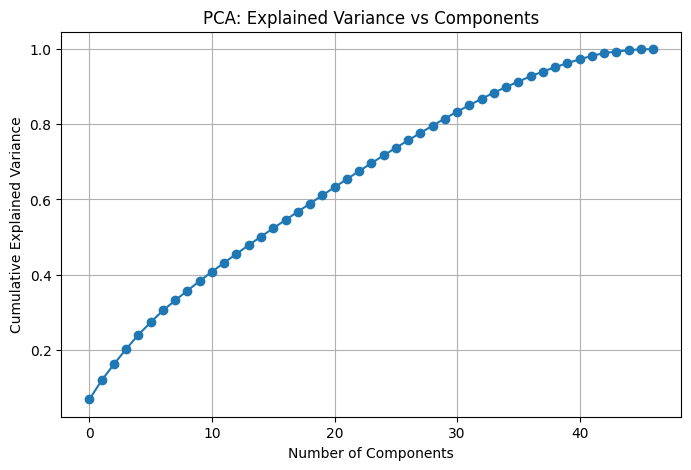

PCA-reduced shape: (1000000, 6) (keeping 6 components)


In [7]:
# === Block 5: PCA dimensionality reduction ===
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on scaled features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs Components")
plt.grid(True)
plt.show()

# Example: keep first 6 components (good start for 6 qubits)
n_qubits = 6
Xp = X_pca[:, :n_qubits]
print(f"PCA-reduced shape: {Xp.shape} (keeping {n_qubits} components)")


In [8]:
# === Inspect PCA components ===

# 1) Variance explained by each component
print("Explained variance ratio (first 6 PCs):")
for i, v in enumerate(pca.explained_variance_ratio_[:6]):
    print(f"PC{i+1}: {v:.4f}")

# 2) Component loadings (first 6 PCs)
loadings = pd.DataFrame(
    pca.components_[:6],        # first 6 PCs
    columns=X.columns,          # original features
    index=[f'PC{i+1}' for i in range(6)]
)

print("\nTop contributing features per component:")
for pc in loadings.index:
    print(f"\n{pc}:")
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(5))


Explained variance ratio (first 6 PCs):
PC1: 0.0680
PC2: 0.0502
PC3: 0.0432
PC4: 0.0405
PC5: 0.0380
PC6: 0.0332

Top contributing features per component:

PC1:
month                               0.460545
velocity_4w                         0.458435
velocity_24h                        0.394027
velocity_6h                         0.332576
date_of_birth_distinct_emails_4w    0.257046
Name: PC1, dtype: float64

PC2:
customer_age                    0.381967
current_address_months_count    0.308986
phone_home_valid                0.246865
employment_status_CC            0.242855
proposed_credit_limit           0.242242
Name: PC2, dtype: float64

PC3:
payment_type_AC           0.469708
bank_months_count         0.396246
housing_status_BE         0.349541
customer_age              0.251013
intended_balcon_amount    0.249370
Name: PC3, dtype: float64

PC4:
housing_status_BC        0.420523
proposed_credit_limit    0.374283
credit_risk_score        0.369890
housing_status_BB        0.366276
inc

In [9]:
# === Block 6: Train/test split + small stratified subset + quick baseline ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np

# Xp = PCA-reduced features (n_samples, n_qubits) from Block 5
# y = original target series (aligned with X_scaled / Xp)

# 1) Full train/test split (stratify because of class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    Xp, y, test_size=0.2, stratify=y, random_state=42
)
print("Full split shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 2) Create a small stratified subset for quick experiments (e.g., 2000 samples)
#    This is useful to prototype QML models quickly on a simulator.
small_n = 2000
if len(y) > small_n:
    # keep proportion of classes
    X_small, _, y_small, _ = train_test_split(
        Xp, y, train_size=small_n, stratify=y, random_state=42
    )
else:
    X_small, y_small = Xp.copy(), y.copy()

# split small into train/test
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_small, y_small, test_size=0.2, stratify=y_small, random_state=42
)
print("Small subset shapes:", X_train_small.shape, X_test_small.shape)

# 3) Quick classical baseline on the PCA features (Logistic Regression with class_weight)
clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\nBaseline (LogisticRegression) on full PCA features:")
print("Accuracy:", accuracy_score(y_test, y_pred))
try:
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
except Exception:
    pass
print("\nClassification report (full test):\n", classification_report(y_test, y_pred, digits=4))

# 4) Quick baseline on small subset (to compare speed / expected perf)
clf_small = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf_small.fit(X_train_small, y_train_small)
y_pred_small = clf_small.predict(X_test_small)
print("Small subset baseline accuracy:", accuracy_score(y_test_small, y_pred_small))


Full split shapes: (800000, 6) (200000, 6) (800000,) (200000,)
Small subset shapes: (1600, 6) (400, 6)

Baseline (LogisticRegression) on full PCA features:
Accuracy: 0.725525
ROC AUC: 0.7775936278878606

Classification report (full test):
               precision    recall  f1-score   support

           0     0.9954    0.7259    0.8395    197794
           1     0.0275    0.6963    0.0530      2206

    accuracy                         0.7255    200000
   macro avg     0.5115    0.7111    0.4462    200000
weighted avg     0.9847    0.7255    0.8308    200000

Small subset baseline accuracy: 0.7275


In [10]:
# === Block 7: Variational Quantum Classifier (VQC) with PennyLane ===
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.metrics import accuracy_score

# use 6 qubits = 6 PCA features
n_qubits = X_train_small.shape[1]
dev = qml.device("default.qubit", wires=n_qubits, shots=None)

# variational circuit: encode + ansatz + measure
n_layers = 2
shape = (n_layers, n_qubits, 3)

@qml.qnode(dev, interface="autograd")
def circuit(params, x):
    # encode features with AngleEmbedding
    qml.templates.AngleEmbedding(x, wires=range(n_qubits), rotation='Y')
    # variational block
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    # measure expectation of PauliZ on first qubit
    return qml.expval(qml.PauliZ(0))

# map labels {0,1} -> {-1,1}
y_train_q = pnp.array(2*y_train_small.values - 1)
y_test_q = pnp.array(2*y_test_small.values - 1)

# init params
params = pnp.random.normal(0, 0.1, shape, requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.1)

def loss(params, X, y):
    preds = pnp.array([circuit(params, x) for x in X])
    return pnp.mean((preds - y)**2)

# training loop
epochs = 20
for epoch in range(epochs):
    params = opt.step(lambda p: loss(p, X_train_small, y_train_q), params)
    if epoch % 5 == 0 or epoch == epochs-1:
        preds_train = pnp.array([circuit(params, x) for x in X_train_small])
        acc_train = accuracy_score((preds_train > 0).astype(int), y_train_small)
        print(f"Epoch {epoch}: train_acc = {acc_train:.3f}")

# evaluate on test set
preds_test = pnp.array([circuit(params, x) for x in X_test_small])
acc_test = accuracy_score((preds_test > 0).astype(int), y_test_small)
print("\nTest accuracy (small subset):", acc_test)


Epoch 0: train_acc = 0.383
Epoch 5: train_acc = 0.384
Epoch 10: train_acc = 0.384
Epoch 15: train_acc = 0.389
Epoch 19: train_acc = 0.387

Test accuracy (small subset): 0.41


In [11]:
# === Improved VQC training: sigmoid readout + BCE + Adam + minibatches ===
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

n_qubits = X_train_small.shape[1]
dev = qml.device("default.qubit", wires=n_qubits, shots=None)

n_layers = 3                 # try 2->4; 3 is a reasonable next step
shape = (n_layers, n_qubits, 3)

@qml.qnode(dev, interface="autograd")
def circuit(params, x):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits), rotation='Y')
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

# helper: map expectation -> probability
def exp_to_prob(exp):
    # exp in [-1,1] -> (exp+1)/2 in [0,1]; apply a small sigmoid temperature if desired
    return (exp + 1.0) / 2.0

# binary cross-entropy loss with optional class weights
def bce_loss(params, X_batch, y_batch, class_weights=None):
    exps = pnp.array([circuit(params, x) for x in X_batch])
    probs = exp_to_prob(exps)
    # clip for numerical stability
    probs = pnp.clip(probs, 1e-6, 1 - 1e-6)
    # y_batch are 0/1
    if class_weights is None:
        loss = -pnp.mean(y_batch * pnp.log(probs) + (1 - y_batch) * pnp.log(1 - probs))
    else:
        # apply per-sample weights
        weights = pnp.where(y_batch == 1, class_weights[1], class_weights[0])
        loss = -pnp.mean(weights * (y_batch * pnp.log(probs) + (1 - y_batch) * pnp.log(1 - probs)))
    return loss

# prepare data as numpy arrays (pennylane.autograd-friendly)
X_tr = pnp.array(X_train_small)
y_tr = pnp.array(y_train_small.values.astype(float))
X_te = pnp.array(X_test_small)
y_te = pnp.array(y_test_small.values.astype(float))

# compute simple class weights from training fold (to de-bias loss)
classes = np.unique(y_train_small)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_small)
class_weights = {int(classes[i]): cw[i] for i in range(len(classes))}
print("Class weights:", class_weights)

# init params and optimizer
params = pnp.random.normal(0, 0.1, shape, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.02)

# minibatch training
batch_size = 64
n_epochs = 60

for epoch in range(n_epochs):
    # shuffle indices
    perm = np.random.permutation(len(X_tr))
    for i in range(0, len(X_tr), batch_size):
        idx = perm[i:i+batch_size]
        Xb = X_tr[idx]
        yb = y_tr[idx]
        params = opt.step(lambda p: bce_loss(p, Xb, yb, class_weights=class_weights), params)

    # evaluate each epoch (or every few epochs)
    if epoch % 5 == 0 or epoch == n_epochs - 1:
        exps_tr = pnp.array([circuit(params, x) for x in X_tr])
        preds_tr = (exp_to_prob(exps_tr) > 0.5).astype(int)
        acc_tr = accuracy_score(y_tr, preds_tr)

        exps_te = pnp.array([circuit(params, x) for x in X_te])
        probs_te = exp_to_prob(exps_te)
        preds_te = (probs_te > 0.5).astype(int)
        acc_te = accuracy_score(y_te, preds_te)

        # compute ROC AUC (if both classes present in test)
        try:
            auc = roc_auc_score(y_te, probs_te)
        except Exception:
            auc = float('nan')

        prec, rec, f1, _ = precision_recall_fscore_support(y_te, preds_te, average='binary', zero_division=0)
        print(f"Epoch {epoch:03d} | train_acc {acc_tr:.3f} | test_acc {acc_te:.3f} | ROC-AUC {auc:.3f} | prec {prec:.3f} rec {rec:.3f} f1 {f1:.3f}")

# final test metrics
exps_te = pnp.array([circuit(params, x) for x in X_te])
probs_te = exp_to_prob(exps_te)
preds_te = (probs_te > 0.5).astype(int)
print("\nFINAL test acc:", accuracy_score(y_te, preds_te))
print("FINAL ROC AUC:", roc_auc_score(y_te, probs_te))
print("FINAL precision/recall/f1:", precision_recall_fscore_support(y_te, preds_te, average='binary', zero_division=0)[:3])


Class weights: {0: np.float64(0.5056890012642224), 1: np.float64(44.44444444444444)}
Epoch 000 | train_acc 0.431 | test_acc 0.415 | ROC-AUC 0.444 | prec 0.009 rec 0.500 f1 0.017
Epoch 005 | train_acc 0.573 | test_acc 0.552 | ROC-AUC 0.686 | prec 0.017 rec 0.750 f1 0.032
Epoch 010 | train_acc 0.574 | test_acc 0.562 | ROC-AUC 0.766 | prec 0.017 rec 0.750 f1 0.033
Epoch 015 | train_acc 0.571 | test_acc 0.552 | ROC-AUC 0.706 | prec 0.017 rec 0.750 f1 0.032
Epoch 020 | train_acc 0.586 | test_acc 0.578 | ROC-AUC 0.727 | prec 0.018 rec 0.750 f1 0.034
Epoch 025 | train_acc 0.569 | test_acc 0.555 | ROC-AUC 0.717 | prec 0.017 rec 0.750 f1 0.033
Epoch 030 | train_acc 0.571 | test_acc 0.568 | ROC-AUC 0.706 | prec 0.017 rec 0.750 f1 0.034
Epoch 035 | train_acc 0.569 | test_acc 0.580 | ROC-AUC 0.704 | prec 0.018 rec 0.750 f1 0.034
Epoch 040 | train_acc 0.574 | test_acc 0.578 | ROC-AUC 0.686 | prec 0.018 rec 0.750 f1 0.034
Epoch 045 | train_acc 0.588 | test_acc 0.583 | ROC-AUC 0.743 | prec 0.018 rec 

In [12]:
# === Balanced minibatch VQC training (equal pos/neg per batch) ===
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support

# reuse circuit definition from previous cell (circuit(params, x))
# ensure `params` re-initialized for fair comparison:
n_layers = 3
shape = (n_layers, n_qubits, 3)
params = pnp.random.normal(0, 0.1, shape, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.02)

# prepare arrays
X_tr_full = pnp.array(X_train_small.astype(float))
y_tr_full = np.array(y_train_small.values.astype(int))  # keep as numpy for indexing convenience
X_te_arr = pnp.array(X_test_small.astype(float))
y_te_arr = np.array(y_test_small.values.astype(int))

# indices for positives & negatives
pos_idx = np.where(y_tr_full == 1)[0]
neg_idx = np.where(y_tr_full == 0)[0]

# training params
batch_pos = 16   # per batch positives
batch_neg = 48   # per batch negatives -> total batch_size=64 (adjust)
n_epochs = 60

def batch_loss_balanced(params, pos_idxs, neg_idxs):
    idxs = np.concatenate([pos_idxs, neg_idxs])
    Xb = X_tr_full[idxs]
    yb = pnp.array(y_tr_full[idxs].astype(float))
    return bce_loss(params, Xb, yb, class_weights=None)  # use BCE without class weights

for epoch in range(n_epochs):
    # shuffle negatives each epoch and sample positives with replacement if needed
    np.random.shuffle(neg_idx)
    np.random.shuffle(pos_idx)
    # create batches until negatives exhausted
    n_neg_batches = len(neg_idx) // batch_neg
    for i in range(n_neg_batches):
        neg_batch_idx = neg_idx[i*batch_neg:(i+1)*batch_neg]
        # sample positives with replacement if too few
        if len(pos_idx) < batch_pos:
            pos_batch_idx = np.random.choice(pos_idx, size=batch_pos, replace=True)
        else:
            # rotate positives so we still see many different positives
            start = (i*batch_pos) % len(pos_idx)
            pos_batch_idx = pos_idx[start:start+batch_pos]
            if len(pos_batch_idx) < batch_pos:
                pos_batch_idx = np.concatenate([pos_batch_idx, pos_idx[:(batch_pos - len(pos_batch_idx))]])
        params = opt.step(lambda p: batch_loss_balanced(p, pos_batch_idx, neg_batch_idx), params)

    # evaluation every 5 epochs
    if epoch % 5 == 0 or epoch == n_epochs - 1:
        exps_te = pnp.array([circuit(params, x) for x in X_te_arr])
        probs_te = (exps_te + 1.0) / 2.0
        preds_te = (probs_te > 0.5).astype(int)
        acc_te = accuracy_score(y_te_arr, preds_te)
        try:
            auc = roc_auc_score(y_te_arr, probs_te)
        except:
            auc = float('nan')
        prec, rec, f1, _ = precision_recall_fscore_support(y_te_arr, preds_te, average='binary', zero_division=0)
        print(f"Epoch {epoch:03d} | test_acc {acc_te:.3f} | ROC-AUC {auc:.3f} | prec {prec:.3f} rec {rec:.3f} f1 {f1:.3f}")


Epoch 000 | test_acc 0.502 | ROC-AUC 0.519 | prec 0.015 rec 0.750 f1 0.029
Epoch 005 | test_acc 0.585 | ROC-AUC 0.689 | prec 0.018 rec 0.750 f1 0.035
Epoch 010 | test_acc 0.605 | ROC-AUC 0.682 | prec 0.019 rec 0.750 f1 0.037
Epoch 015 | test_acc 0.618 | ROC-AUC 0.688 | prec 0.019 rec 0.750 f1 0.038
Epoch 020 | test_acc 0.613 | ROC-AUC 0.695 | prec 0.019 rec 0.750 f1 0.037
Epoch 025 | test_acc 0.618 | ROC-AUC 0.699 | prec 0.019 rec 0.750 f1 0.038
Epoch 030 | test_acc 0.605 | ROC-AUC 0.671 | prec 0.019 rec 0.750 f1 0.037
Epoch 035 | test_acc 0.605 | ROC-AUC 0.693 | prec 0.019 rec 0.750 f1 0.037
Epoch 040 | test_acc 0.613 | ROC-AUC 0.691 | prec 0.019 rec 0.750 f1 0.037
Epoch 045 | test_acc 0.595 | ROC-AUC 0.695 | prec 0.018 rec 0.750 f1 0.036
Epoch 050 | test_acc 0.595 | ROC-AUC 0.694 | prec 0.018 rec 0.750 f1 0.036
Epoch 055 | test_acc 0.590 | ROC-AUC 0.694 | prec 0.018 rec 0.750 f1 0.035
Epoch 059 | test_acc 0.580 | ROC-AUC 0.703 | prec 0.018 rec 0.750 f1 0.034
